In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 21 17:48:37 2023

@author: Bassel
"""

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class knn():
   def  __init__(self,k, dis_flag=0):
        self.k=k
        self.dis_flag=dis_flag
        
   def fit(self, X,y):
       self.X=X
       self.y=y
   
   def compute_dis(self, Xtest):
       return np.sum((Xtest-self.X)**2 ,axis=1)
       
   def predict(self, Xtest):
       y=[]
       for i in range(Xtest.shape[0]):
           temp=dict()
           d=self.compute_dis(Xtest[i])
           indices=np.argsort(d)
           ys=self.y[indices[:k]]
           for j in ys:
               if j in temp.keys():    
                   temp[j]=temp[j]+1
               else:
                   temp.update({j:1})
           y_temp=list(temp.keys())[np.argmax(list(temp.values()))]
           y.append(y_temp)
           self.X=np.vstack((self.X, Xtest[i]))
           self.y=np.append(self.y,y_temp)
       return np.asarray(y)

In [3]:
#parameters
n=20
k=3
max_dis=40
train_num=100
test_num=50

In [7]:
#generate dataset
x1=np.random.normal(50,20,[100,2])
x2=np.random.normal(150,40,[100,2])
y1=np.ones_like(x1[:,0])
y1=y1[:,np.newaxis]
y2=np.zeros_like(x1[:,0])
y2=y2[:,np.newaxis]
x1=np.hstack((x1,y1))
x2=np.hstack((x2,y2))
x=np.vstack((x1,x2))

y_train=x[:,2]
x_train=x[:,:2]

x_test=np.random.rand(test_num,2)*255

In [8]:
#fitting and predicting
obj=knn(5)
obj.fit(x_train,y_train)
y=obj.predict(x_test)

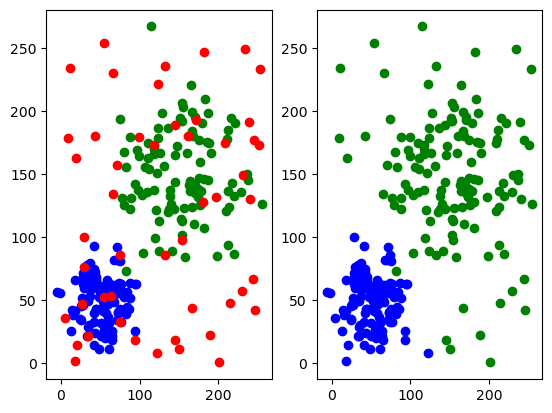

In [9]:
#ploting
plt.figure()
plt.xlim((0,255))

plt.subplot(1,2,1)
plt.scatter(x1[:,0],x1[:,1],color='blue')
plt.scatter(x2[:,0],x2[:,1],color='green')
plt.scatter(x_test[:,0],x_test[:,1],color='red')

plt.subplot(1,2,2)
plt.scatter(x1[:,0],x1[:,1],color='blue')
plt.scatter(x2[:,0],x2[:,1],color='green')
plt.scatter(x_test[y==0,0],x_test[y==0,1],color='green')
plt.scatter(x_test[y==1,0],x_test[y==1,1],color='blue')

plt.show()